# Intermediate Python @ Calico

Course instructors: [Tamas Nagy](mailto:tnagy@calicolabs.com) and [Taylor Cavazos](mailto:tcavazos@calicolabs.com)


#### Description

This course is designed to get you more comfortable with *performing common data science techniques in the Python programming language*. Python is very expressive, powerful, and popular language, especially in the data science field. You are very likely to find libraries, tutorials, and documentation for routine data science tasks in Python. The rich ecosystem will let you hit the ground running and let you quickly translate raw data into interpretable tables, statistics, and graphs. 

During this course, we will teach you how to perform data exploration in Python with a focus on tabular data and images. We will be using standard Python libraries that are stable, well-documented, and tested so the skills you acquire here should be helpful for many years to come. We will teach you how to tidy up your data, continuously visualize your data, and then use various statistical techniques to extract meaning from datasets.

#### Objectives

After finishing this course, students will be able to:

1. Comfortably interact with tabular data in Python
2. Recognize problems with datasets and correct errors 
3. Visualize datasets to derive new insight
4. Understand and leverage common statistical approaches
5. Extract quantitative data from images and movies

#### Outline

**Lesson 1:** Basic data manipulation and plotting  
**Lesson 2:** Pre-processing, descriptive statistics, and dimensionality reduction  
**Lesson 3:** Linear regression and interpreting statistical significance  
**Lesson 4:** Clustering data and heatmaps  
**Lesson 5:** Image analysis and feature extraction  
**Lesson 6:** Temporal image data and tracking  

**Optional final project:** Send us a description of a dataset you want to analyze, what question you want to answer with it, and what you would like to accomplish by the end of the course. This will help us help you!  


## General approach for data exploration

The basic approach we will taking is modeled off Hadley Wickham's [R for Data Science](https://r4ds.had.co.nz/explore-intro.html). The same principles apply whether the language is R or Python. The following figure from that book illustrates the general procedure that data scientists use when working with a dataset:

![](https://d33wubrfki0l68.cloudfront.net/795c039ba2520455d833b4034befc8cf360a70ba/558a5/diagrams/data-science-explore.png)



## What is relational data?

A lot of the data that we interact with is *relational* or *labeled* data where each datapoint has several associated attributes. Think of data you might interact with in Excel. A lot of scientific data can be represented in this way and this allows us to leverage 

## Import `Pandas` and `NumPy`

`Pandas` and `NumPy` are two powerful Python libraries that have many convenience classes and functions. `Pandas` stands for "panel datas", i.e. tabular/relational data, and `NumPy` has many common numerical functions (e.g. random number generators, linear algebra, basic statistics, etc)

In [2]:
import pandas as pd
import numpy as np

The `pandas` [documentation](http://pandas.pydata.org/pandas-docs/stable/user_guide/) is very thorough and I recommend giving it a read. You can also access it by running `help(function)` or `?function` in `IPython`.

## Load the `iris` dataset

This is a classic dataset that is often used in introductory data science classes. 

In [3]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

The `read_csv` function has many useful parameters that you can adjust if your dataset has nonstandard features:

In [4]:
?pd.read_csv

In general, the `help(func)` or `?func` tools are very useful to determine what parameters and in what order you need to pass data to a function `func`.

## Viewing the data

Our dataset is larger than what we can conveniently show on a computer screen (which is common!) so `pandas` provides some convenience functions to get a feel for the dataset:

In [5]:
# we have 150 rows!
iris.shape

(150, 5)

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3 style="color:red">Exercise: Describe everything</h3>

The default behavior of `describe()` is to only print out statistics on numerical columns. Change this to all columns

In [9]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Selecting data

In this section, we'll explore how to select specific subsets of data

In [12]:
# make a small example dataset to show indexing behavior
df1 = pd.DataFrame(
    {
        "id": list(range(3, 11)), 
        "char": ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
    }
)
df1

,id,char
0,3,a
1,4,b
2,5,c
3,6,d
4,7,e
5,8,f
6,9,g
7,10,h


Each column can have a different datatype, e.g. `int64`, `float`, `object`, etc

In [13]:
df1.dtypes

id       int64
char    object
dtype: object

DataFrames have two indices for the rows and columns called `index` and `columns`, respectively

In [14]:
df1.index

RangeIndex(start=0, stop=8, step=1)

In [15]:
df1.columns

Index(['id', 'char'], dtype='object')

You can get all the values in a column by passing its name:

In [16]:
df1["id"]

0     3
1     4
2     5
3     6
4     7
5     8
6     9
7    10
Name: id, dtype: int64

### Setting values

We can also set values. For example, here we are adding a new column called `vals` and passing an array of correct length of boolean values

In [17]:
df1["vals"] = [True, False, False, True, False, True, True, False] # new column with boolean values

<h3 style="color:red">Exercise: More setting</h3>

Set column `id` to the numbers between 4 and 11, inclusive. Print out the dataframe. What do you see? Are DataFrames mutable?

In [20]:
df1["id"] = range(4, 12)
df1

,id,char,vals
0,4,a,True
1,5,b,False
2,6,c,False
3,7,d,True
4,8,e,False
5,9,f,True
6,10,g,True
7,11,h,False


### Indexing (`loc` vs `iloc`)

We can also do more advanced indexing using the `loc` and `iloc` indexers. The best way to learn the differences between them is an example:

In [21]:
df1.iloc[0:3, 1]

0    a
1    b
2    c
Name: char, dtype: object

In [22]:
df1.loc[0:3, "char"]

0    a
1    b
2    c
3    d
Name: char, dtype: object

In [23]:
df1.index = [5, 6, 7, 0, 1, 2, 3, 4]

In [24]:
df1.iloc[0:3, 1]

5    a
6    b
7    c
Name: char, dtype: object

In [25]:
df1.loc[0:3, "char"]

0    d
1    e
2    f
3    g
Name: char, dtype: object

<h3 style="color:red">Exercise: Switch to alphanumeric index and test behavior</h3>

Change the index of `df2` to the values in `genes` and print out the `id`s of all genes between `NANOG` and `ACTB`, inclusive. Use both `iloc` and `loc`

In [26]:
df2 = df1.copy()

genes = ["OCT4", "SOX2", "AQP4", "NANOG", "ATG8", "GAPDH", "ACTB", "MYH2"]

#### `loc`

In [27]:
df2.index = genes

df2.loc["NANOG":"ACTB", "id"]

NANOG     7
ATG8      8
GAPDH     9
ACTB     10
Name: id, dtype: int64

#### `iloc`

In [28]:
df2.iloc[3:7, 0]

NANOG     7
ATG8      8
GAPDH     9
ACTB     10
Name: id, dtype: int64

<h3 style="color:red">Exercise: set subset of values</h3>

Set `id` equal to 10-13 for the 4th through 8th rows, inclusive.

In [29]:
df2.iloc[3:7, 0] = [10, 11, 12, 13]
df2

,id,char,vals
OCT4,4,a,True
SOX2,5,b,False
AQP4,6,c,False
NANOG,10,d,True
ATG8,11,e,False
GAPDH,12,f,True
ACTB,13,g,True
MYH2,11,h,False


### Boolean indexing

We can also provide a boolean index to only select a subset of rows (or columns)

In [30]:
iris["sepal_length"] > 5 # indices where the sepal length is longer than 5

0       True
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10      True
11     False
12     False
13     False
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22     False
23      True
24     False
25     False
26     False
27      True
28      True
29     False
       ...  
120     True
121     True
122     True
123     True
124     True
125     True
126     True
127     True
128     True
129     True
130     True
131     True
132     True
133     True
134     True
135     True
136     True
137     True
138     True
139     True
140     True
141     True
142     True
143     True
144     True
145     True
146     True
147     True
148     True
149     True
Name: sepal_length, Length: 150, dtype: bool

In [31]:
iris[iris["sepal_length"] > 5].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


<h3 style="color:red">Exercise: Boolean indexing</h3>

Select all rows with `petal_length` greater than 2

In [32]:
iris[iris["petal_length"] > 2].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


<h3 style="color:red">Exercise: Complex boolean indexing</h3>

Select the rows with sepal lengths less than or equal to 6 **and** petal lengths greater than 2 and report the number of flowers matching this combo

Hint: the `&` operator can be used to combine equalities that need to **both** be true. E.g.

```
    df[(cond) & (cond)]
```

In [33]:
slice = iris[(iris["sepal_length"] <= 6) & (iris["petal_length"] > 2)]
slice.shape[0]

39

### Missing data

`pandas` represents missing data using `np.nan`. Generally you'll want to drop rows with NaNs or replace them with realized values. Say if we select a subset of a dataset:

In [34]:
sub_iris = iris.copy()
sub_iris.loc[sub_iris["petal_length"] < 1.4, "petal_length"] = np.nan
sub_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,NaN,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
iris.describe() # ignores NaNs!

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


`notna()` and `isna()` will allow you to select non-NaN or NaN values, respectively, by returning a boolean mask

In [30]:
sub_iris["petal_length"].notna().head()

0     True
1     True
2    False
3     True
4     True
Name: petal_length, dtype: bool

In [31]:
sub_iris["petal_length"].isna().head()

0    False
1    False
2     True
3    False
4    False
Name: petal_length, dtype: bool

### `any` and `all`

These two functions do exactly what they sound like. `any` returns `True` if any values along an axis are true. `all` requires all to be true to return true, otherwise it returns false.

`all`:
```
    df[0, :] = df[0, 1] & df[0, 2] & ... 
    ...
```

`any`:
```
    df[0, :] = df[0, 1] | df[0, 2] | ... 
    ...
```

In [53]:
sub_iris.isna().any(1).head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [54]:
sub_iris.isna().all(1).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

<h3 style="color:red">Exercise: Set all NaNs to -1</h3>

Set all NaNs in `sub_iris` to -1 and get the standard deviations for each column:

In [34]:
# Alternative way
# sub_iris.loc[sub_iris["petal_length"].isna(), "petal_length"] = -1
# sub_iris.describe(include='all')

sub_iris.fillna(-1, inplace=False).describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.00000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.59400,1.199333,NaN
std,0.828066,0.435866,2.07132,0.762238,NaN
min,4.300000,2.000000,-1.00000,0.100000,NaN
25%,5.100000,2.800000,1.60000,0.300000,NaN
50%,5.800000,3.000000,4.35000,1.300000,NaN
75%,6.400000,3.300000,5.10000,1.800000,NaN


### `dropna` and `fillna` to remove or replace missing data

In [35]:
sub_iris.dropna().head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [36]:
sub_iris.fillna(-1).head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,-1.0,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Introduction to plotting

The primary plotting package in the Python data science ecosystem is `matplotlib`. It is an incredibly powerful and large library that has a long history and, as such, there are lots of tutorials available online that show out-of-date or non-standard approaches. To the best of our ability, we have followed best practices while plotting and also attempt to be consistent with all of our plots. 

### Figure vs axes vs axis

`matplotlib`'s terminology can get a little confusing, but we find the following plot to be useful to remember the distinction between `figure`, `axes`, and `axis`:

![](https://matplotlib.org/1.5.1/_images/fig_map.png)

Lets first import `matplotlib`'s pyplot module 

In [36]:
import matplotlib.pyplot as plt

### Basic scatter plot using `pyplot`

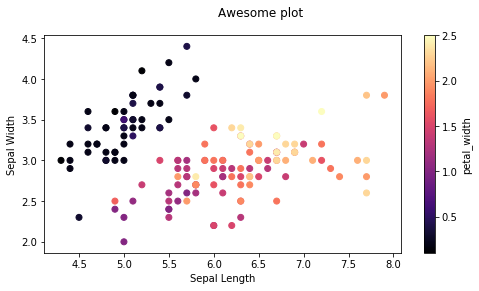

In [38]:
plt.figure(figsize=(8, 4))
plt.scatter(x=iris.sepal_length, y=iris.sepal_width, c=iris.petal_width, cmap='magma')
plt.colorbar(label="petal_width");
plt.suptitle("Awesome plot") # make sure to have a helpful titles and labels
plt.xlabel("Sepal Length") 
plt.ylabel("Sepal Width")
plt.show()

### Basic scatter using `pandas`

This is still `matplotlib` in the background, but it has a different API:

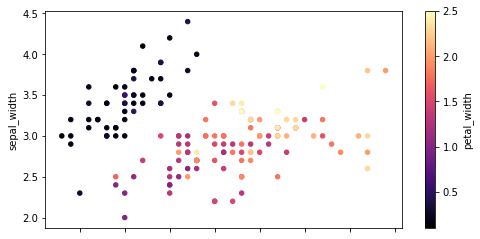

In [39]:
iris.plot.scatter(x="sepal_length", y="sepal_width", c="petal_width", figsize=(8, 4), cmap="magma")

### Histograms and density plots

Sometimes we want to quickly identify the distribution shape. Histograms and kernel density estimates allow us to do just that

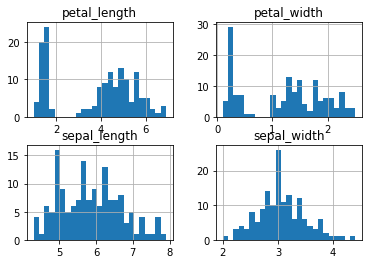

In [40]:
iris.hist(bins=25);

Looks like petal sizes have a bimodel distribution!

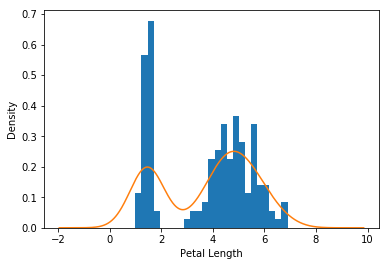

In [41]:
fig, axes = plt.subplots()
iris["petal_length"].plot.hist(ax=axes, bins=25, density=True)
iris["petal_length"].plot.kde(ax=axes)
axes.set_xlabel("Petal Length");

<h3 style="color:red">Exercise: Selecting a certain population for plotting</h3>

Select only the larger population and plot the new kernel density estimate

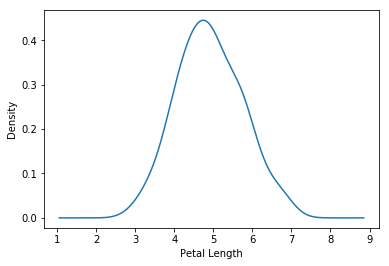

In [42]:
iris.loc[iris["petal_length"] > 2.2, "petal_length"].plot.kde();
plt.xlabel("Petal Length");

# RNAseq dataset

There are two datasets here, the first is the sample sheet (doe - design of experiment) and the second is the abundance file.  The structure of the abundance table is the first two columns are ensembl gene ID and gene symbols, and the remaining columns are samples which correspond to the sample column in the doe file. The values are ln(TPM). 

The RNAseq data from liver cells grown in a plate and sampled at baseline (day 0) or split into 3 groups and sampled at day 5:  BSA (control), or FFA_LPS (treatment 1) or TMC (treatment 2). Both of these treatments are design to induce the integrated stress response pathway in the liver cell. 

In [38]:
df3 = pd.read_csv("inSphero.abundance.table_edit190410.csv")

In [39]:
df3.head()

,gene_id,symbol,baseline_1,baseline_2,baseline_3,DE.BSA.DMSO.day5_2,DE.BSA.DMSO.day5_3,DE.FFA.LPS.day5_1,DE.FFA.LPS.day5_2,DE.FFA.LPS.day5_3,DE.TMC.day5_1,DE.TMC.day5_2,DE.TMC.day5_3
0,ENSG00000248155,WI2-89927D4.1,0.496074,0.496074,0.496074,-0.627376,-0.627376,-4.61901,0.279975,-4.616600,-0.490349,-4.298650,-4.748550
1,ENSG00000274584,RP11-819M15.2,0.496074,0.496074,0.496074,-0.627376,-0.627376,-4.61901,-4.714800,-4.616600,-4.720340,-4.298650,-4.748550
2,ENSG00000228826,RP11-344P13.4,0.496074,0.496074,0.496074,-0.627376,-0.627376,-4.61901,-0.727078,-4.616600,-0.665645,-0.203773,-0.799714
3,ENSG00000278847,RP11-414C23.1,0.496074,0.496074,0.496074,-0.627376,-0.627376,-4.61901,-4.714800,-4.616600,-4.720340,-4.298650,-0.356121
4,ENSG00000272389,CTC-487M23.7,0.496074,0.496074,0.496074,-0.627376,-0.627376,-4.61901,-4.714800,-0.865132,-4.720340,-4.298650,-4.748550


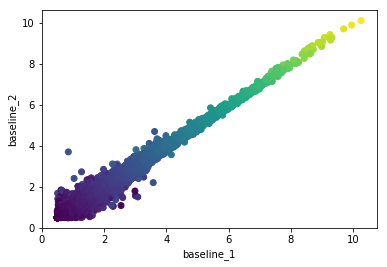

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True)
axes.scatter(df3["baseline_1"], df3["baseline_2"], c=df3["baseline_3"])
axes.set_xlabel("baseline_1")
axes.set_ylabel("baseline_2");

In [47]:
from scipy import stats

In [48]:
stats.pearsonr(df3["baseline_1"], df3["baseline_2"])

(0.9961517923245065, 0.0)

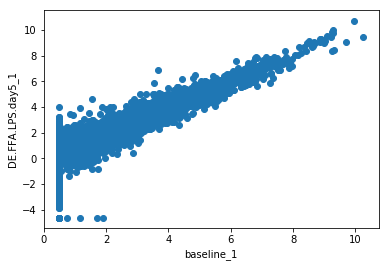

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True)
axes.scatter(df3["baseline_1"], df3["DE.FFA.LPS.day5_1"])
axes.set_xlabel("baseline_1")
axes.set_ylabel("DE.FFA.LPS.day5_1");

In [50]:
stats.pearsonr(df3["baseline_1"], df3["DE.FFA.LPS.day5_1"])

(0.8673491476998687, 0.0)

## Extra work: Grouping

- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently.
- **Combining** the results into a data structure.

In [51]:
grouped = iris.groupby("species")
grouped

`grouped` is a dict-like object that you can iterate over

In [54]:
for name, group in grouped:
    print(name, ": ", group.shape)

setosa :  (50, 5)
versicolor :  (50, 5)
virginica :  (50, 5)


In [57]:
grouped.get_group("setosa").head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<h3 style="color:red">Exercise: plot groups</h3>

Plot each flower specie in a different color

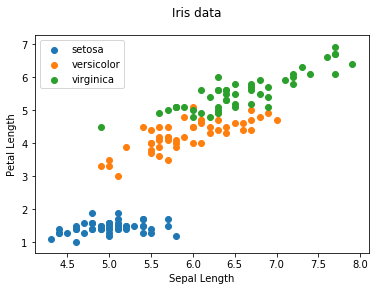

In [50]:
fig, axes = plt.subplots()
for name, group in iris.groupby("species"):
    axes.scatter(group.sepal_length, group.petal_length, label=name)
axes.legend()
axes.set_xlabel("Sepal Length") # or use plt.xlabel
axes.set_ylabel("Petal Length")
fig.suptitle("Iris data")
plt.show()

In [51]:
# fig.savefig('test.png', dpi=300) # to save an image